In [0]:
# fetching the text data from url of my choice
import urllib.request
stringInURL = "https://www.gutenberg.org/files/6130/6130-0.txt"
urllib.request.urlretrieve(stringInURL, "/tmp/finaProject_data.txt")

Out[1]: ('/tmp/finaProject_data.txt', <http.client.HTTPMessage at 0x7f65bce49dc0>)

In [0]:
dbutils.fs.mv("file:/tmp/finaProject_data.txt", "dbfs:/data/finaProject_data.txt")

Out[2]: True

In [0]:
final_RDD = sc.textFile("dbfs:/data/finaProject_data.txt")

In [0]:
textRDD = final_RDD.flatMap(lambda line : line.lower().strip().split(" "))

In [0]:
# map() words to (words,1) intermediate key-value pairs.
import re
# removing punctutations.
cleanToken_RDD = textRDD.map(lambda w: re.sub(r'[^a-zA-Z]','',w))
#prepare to clean stopwords
from pyspark.ml.feature import StopWordsRemover
remove =StopWordsRemover()
stopWords = remove.getStopWords()
cleanData_RDD=cleanToken_RDD.filter(lambda wrds: wrds not in stopWords)
#maps the words to key value pairs
IKVPairsRDD= cleanData_RDD.map(lambda word: (word,1))

In [0]:
Final_word_count_RDD = IKVPairsRDD.reduceByKey(lambda acc, value: acc+value)

In [0]:
final_results = Final_word_count_RDD.map(lambda x: (x[1], x[0])).sortByKey(False).take(25)
print(final_results)

[(2942, ''), (944, 'thy'), (621, 'thus'), (510, 'shall'), (475, 'great'), (448, 'arms'), (409, 'achilles'), (366, 'hector'), (365, 'jove'), (364, 'oer'), (359, 'war'), (349, 'thou'), (345, 'one'), (324, 'gods'), (313, 'yet'), (312, 'troy'), (304, 'son'), (300, 'god'), (287, 'first'), (276, 'let'), (274, 'day'), (261, 'chief'), (261, 'hand'), (259, 'fight'), (258, 'plain')]

In [0]:
# collect() action to get back to python
results = Final_word_count_RDD.collect()
print(results)

[('project', 87), ('gutenberg', 30), ('ebook', 12), ('homer', 162), ('', 2942), ('use', 35), ('anyone', 5), ('anywhere', 2), ('united', 27), ('world', 46), ('restrictions', 2), ('whatsoever', 3), ('may', 239), ('give', 87), ('away', 92), ('reuse', 2), ('online', 5), ('check', 15), ('country', 42), ('using', 7), ('title', 5), ('pope', 9), ('february', 1), ('language', 27), ('set', 33), ('encoding', 1), ('utf', 1), ('produced', 9), ('anne', 2), ('juliet', 1), ('sutherland', 1), ('franks', 1), ('team', 2), ('start', 9), ('translated', 5), ('notes', 14), ('theodore', 2), ('alois', 2), ('buckley', 2), ('flaxmans', 1), ('designs', 6), ('contents', 3), ('introduction', 3), ('popes', 9), ('preface', 6), ('book', 86), ('iii', 12), ('iv', 18), ('vi', 24), ('xiii', 3), ('xiv', 3), ('xx', 3), ('xxi', 2), ('xxiv', 2), ('concluding', 2), ('invoking', 3), ('muse', 8), ('mars', 64), ('achilles', 409), ('assistance', 16), ('jupiter', 49), ('honour', 45), ('vulcan', 43), ('apotheosis', 4), ('evil', 11), ('dream', 14), ('neptune', 49), ('helen', 39), ('paris', 73), ('titled', 2), ('troy', 312), ('wounded', 52), ('otus', 4), ('ephialtes', 3), ('holding', 2), ('captive', 24), ('casting', 5), ('spear', 136), ('meeting', 7), ('andromache', 13), ('separated', 3), ('heralds', 22), ('greek', 86), ('amphorawine', 2), ('hours', 14), ('horses', 22), ('junos', 17), ('shield', 121), ('embassy', 5), ('galley', 3), ('proserpine', 3), ('rhesus', 14), ('discord', 12), ('altar', 10), ('rising', 78), ('sea', 24), ('bacchus', 11), ('ships', 118), ('castor', 3), ('pollux', 4), ('buckles', 8), ('conveying', 2), ('sarpedon', 29), ('lycia', 11), ('sculapius', 3), ('fight', 259), ('descend', 38), ('sun', 51), ('eurynome', 3), ('bringing', 2), ('descending', 34), ('centaur', 2), ('funeral', 33), ('pile', 24), ('hectors', 86), ('priam', 56), ('obtain', 16), ('scepticism', 7), ('result', 8), ('knowledge', 12), ('know', 86), ('ears', 16), ('must', 166), ('continually', 3), ('emancipate', 1), ('acquired', 6), ('aside', 16), ('something', 15), ('us', 141), ('labour', 21), ('acquire', 2), ('difficulty', 10), ('attaches', 1), ('closely', 4), ('progress', 12), ('ascendency', 1), ('things', 28), ('lieu', 3), ('conventional', 2), ('value', 8), ('swept', 12), ('traditional', 3), ('abuses', 1), ('making', 2), ('rapid', 35), ('revenues', 1), ('veil', 26), ('superstitions', 2), ('working', 2), ('actively', 1), ('society', 6), ('credulity', 3), ('finds', 14), ('touchstone', 1), ('wholesome', 7), ('healthy', 2), ('class', 7), ('antagonists', 2), ('conservatism', 1), ('impostures', 1), ('sinecures', 1), ('ancient', 65), ('different', 30), ('allow', 8), ('form', 75), ('test', 2), ('large', 52), ('evidence', 6), ('consistency', 5), ('pertinacious', 1), ('exacting', 1), ('demands', 35), ('human', 51), ('best', 54), ('help', 16), ('characters', 11), ('estimated', 1), ('actual', 3), ('traditionary', 1), ('furnished', 1), ('correct', 5), ('views', 23), ('individuals', 1), ('regard', 18), ('forming', 2), ('measure', 9), ('relation', 2), ('beings', 2), ('incidents', 4), ('handed', 2), ('rather', 25), ('consider', 8), ('narrative', 10), ('respective', 1), ('details', 6), ('unfortunate', 3), ('greatest', 25), ('socrates', 4), ('shakespere', 3), ('perhaps', 53), ('enlightenment', 1), ('three', 35), ('named', 11), ('yet', 313), ('ocean', 43), ('discussion', 4), ('save', 48), ('choosing', 1), ('personality', 2), ('believe', 14), ('upon', 121), ('everything', 10), ('even', 132), ('authorship', 6), ('plays', 3), ('uncertainty', 3), ('xenophon', 2), ('dramatis', 1), ('two', 136), ('dramas', 1), ('style', 15), ('appears', 54), ('enunciator', 1), ('opinions', 6), ('tone', 4), ('read', 21), ('think', 42), ('fairly', 4), ('examined', 2), ('feel', 33), ('convinced', 3), ('worse', 7), ('late', 64), ('years', 58), ('existence', 7), ('whose', 241), ('belief', 10), ('comforted', 1), ('religious', 5), ('sceptic', 1), ('strauss', 1), ('new', 77), ('incalculable', 1), ('theorists', 1), ('last', 137), ('centuries',

Count Words
0 2942 
1 944 thy
2 621 thus
3 510 shall
4 475 great
5 448 arms
6 409 achilles
7 366 hector
8 365 jove
9 364 oer
10 359 war
11 349 thou
12 345 one
13 324 gods
14 313 yet
15 312 troy
16 304 son
17 300 god
18 287 first
19 276 let
20 274 day
21 261 chief
22 261 hand
23 259 fight
24 258 plain
Out[12]:

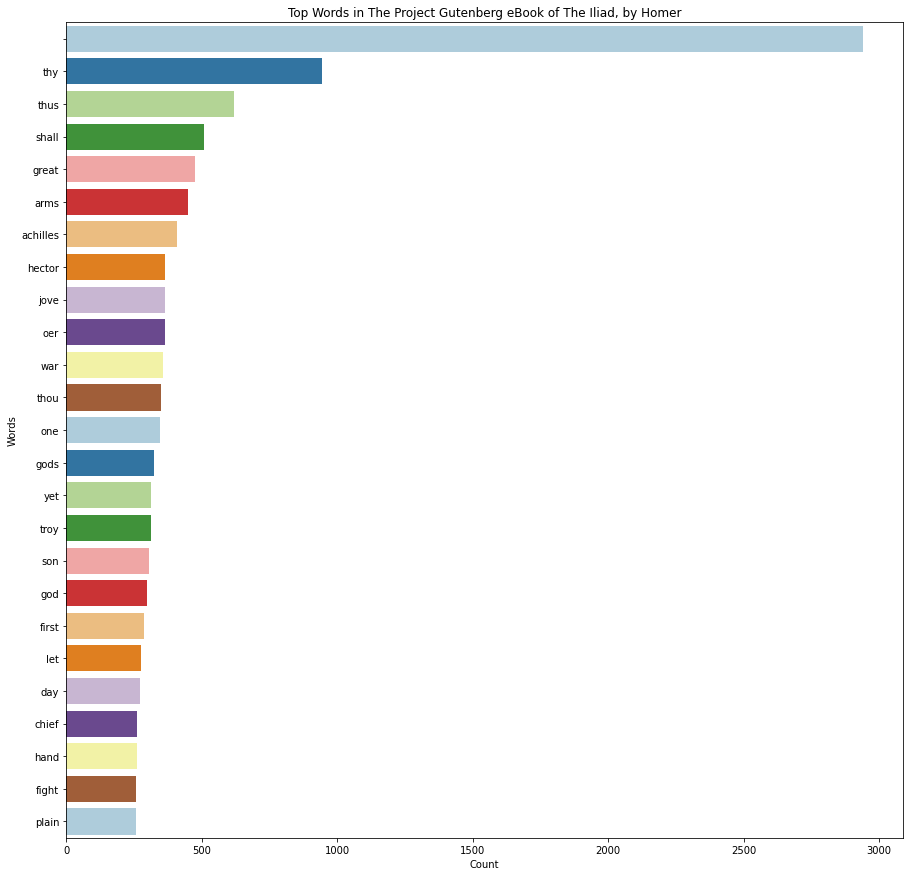

Text(0.5, 1.0, 'Top Words in The Project Gutenberg eBook of The Iliad, by Homer')

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

source = 'The Project Gutenberg eBook of The Iliad, by Homer'
title = 'Top Words in ' + source
xlabel = 'Count'
ylabel = 'Words'

# create Pandas dataframe from list of tuples
df = pd.DataFrame.from_records(final_results, columns =[xlabel, ylabel]) 
print(df)

# create plot (using matplotlib)
plt.figure(figsize=(15,15))
sns.barplot(xlabel, ylabel, data=df, palette="Paired").set_title(title)